In [ ]:
from utils import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

### Optimization results

In [7]:
df_ASAP = pd.read_csv('./../ExpLogs/summ_c_ASAP.csv')
df_NoV2G = pd.read_csv('./../ExpLogs/summ_c_NoV2G.csv')
df_Optim = pd.read_csv('./../ExpLogs/summ_c_Optim.csv')
df_Optim1 = pd.read_csv('./../ExpLogs/summ_c2_Optim.csv')

df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
df_res

,name,transf,client,payoff,total
0,c_ASAP,14937.478645,18301.238246,0.000000,3363.759602
1,c_NoV2G,7522.477944,18301.238246,0.000000,10778.760303
2,c_Optim,6181.244077,18301.238246,1535.183674,10584.810496
3,c2_Optim,4356.432017,18301.238246,1253.999285,12690.806944


### RL Results

In [13]:
def load_rl_gen(name, num, dir = ""):
    train_str = [f"./../ExpLogs/{dir}summ_train_{name}_{i}.csv" for i in range(num)]
    val_str   = [f"./../ExpLogs/{dir}summ_val_{name}_{i}.csv" for i in range(num)]
    test_str  = [f"./../ExpLogs/{dir}summ_test_{name}_{i}.csv" for i in range(num)]

    df_train = pd.concat([pd.read_csv(i) for i in train_str], axis=0).reset_index(drop=True)
    df_val = pd.concat([pd.read_csv(i) for i in val_str], axis=0).reset_index(drop=True)
    df_test = pd.concat([pd.read_csv(i) for i in test_str], axis=0).reset_index(drop=True)
    return df_train, df_val, df_test

In [14]:
df_train, df_val, df_test = load_rl_gen("sac_gen_a", 34)

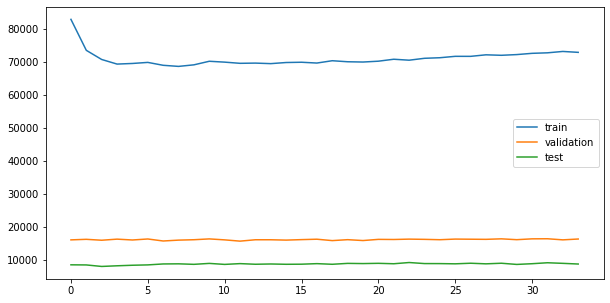

In [23]:
fig1, (ax1) =  plt.subplots(1,1, figsize=(10,5))
ax1.plot(df_train["transf"], label = "train")
ax1.plot(df_val["transf"], label = "validation")
ax1.plot(df_test["transf"], label = "test")

ax1.legend()
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)